In [1]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('../data/raw/AMZN_stock_data.csv')


In [2]:
arima_model = ARIMA(df['Close'], order=(5, 1, 0))
arima_result = arima_model.fit()

In [3]:
arima_forecast = arima_result.forecast(steps=90)

C:\Users\LapTop\AppData\Local\Temp\ipykernel_10552\3711443581.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df.index = pd.to_datetime(df.index)


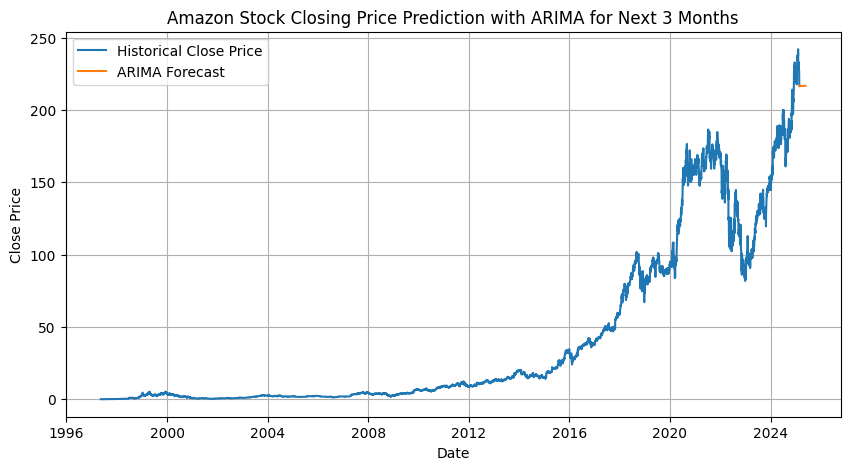

In [4]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Historical Close Price')
plt.plot(pd.date_range(df.index[-1], periods=90, freq='D'), arima_forecast, label='ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price Prediction with ARIMA for Next 3 Months')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import json
predicted_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=90, freq='D')
predictions = {str(date.date()): float(price) for date, price in zip(predicted_dates, arima_forecast)}

# Save the dictionary to a JSON file
with open('../outputs/predictions/arima_forecast_predictions_3months.json', 'w') as json_file:
    json.dump(predictions, json_file, indent=4)

In [7]:
for date, price in zip(predicted_dates, arima_forecast):
    print(f'{date.date()}: {price}')

2025-02-22: 216.68929849111683
2025-02-23: 216.86716146168519
2025-02-24: 216.82460691061198
2025-02-25: 216.60940578460068
2025-02-26: 216.67876159986392
2025-02-27: 216.68738965170215
2025-02-28: 216.68648859599847
2025-03-01: 216.67707515815914
2025-03-02: 216.68202524458897
2025-03-03: 216.6817326657323
2025-03-04: 216.68170631193414
2025-03-05: 216.6812610427965
2025-03-06: 216.68156555457554
2025-03-07: 216.68150557355284
2025-03-08: 216.6815118340157
2025-03-09: 216.68148992699548
2025-03-10: 216.68150782696145
2025-03-11: 216.6815022711856
2025-03-12: 216.68150334224362
2025-03-13: 216.68150216199314
2025-03-14: 216.68150319424632
2025-03-15: 216.6815027737829
2025-03-16: 216.68150288517455
2025-03-17: 216.68150281382214
2025-03-18: 216.6815028735842
2025-03-19: 216.68150284455254
2025-03-20: 216.68150285409126
2025-03-21: 216.681502849356
2025-03-22: 216.6815028528935
2025-03-23: 216.68150285098065
2025-03-24: 216.68150285171615
2025-03-25: 216.68150285138566
2025-03-26: 216.6